In [102]:
import pandas as pd
import numpy as np


In [103]:
data=pd.read_csv("data_improved.csv")

In [104]:
data.head()

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,MultipleLines
0,0,7590-VHVEG,0,0,1,0,1,0,1,0,...,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0,0
1,1,5575-GNVDE,1,0,0,0,34,1,1,1,...,0,0,0,One year,0,Mailed check,56.95,1889.50,0,0
2,2,3668-QPYBK,1,0,0,0,2,1,1,1,...,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1,0
3,3,7795-CFOCW,1,0,0,0,45,0,1,1,...,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,0
4,4,9237-HQITU,0,0,0,0,2,1,2,0,...,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1,0


In [105]:
data["InternetService"]=data["InternetService"].map({0:"No",1:"DSL",2:"Fiber optic"})

In [106]:
data.head()

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,MultipleLines
0,0,7590-VHVEG,0,0,1,0,1,0,DSL,0,...,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0,0
1,1,5575-GNVDE,1,0,0,0,34,1,DSL,1,...,0,0,0,One year,0,Mailed check,56.95,1889.50,0,0
2,2,3668-QPYBK,1,0,0,0,2,1,DSL,1,...,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1,0
3,3,7795-CFOCW,1,0,0,0,45,0,DSL,1,...,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,0
4,4,9237-HQITU,0,0,0,0,2,1,Fiber optic,0,...,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1,0


In [107]:
features=data.drop("Churn",axis=1)
labels=data["Churn"]

we will one hot encode the internet then we will drop the no column when the intrnet is encoded then again we will make analysis on basis of heatmap

In [108]:
from sklearn.model_selection import StratifiedShuffleSplit

In [109]:
split=StratifiedShuffleSplit(
    n_splits=1,
    test_size=0.2,
    random_state=42
)

In [110]:
for train_idx,test_idx in split.split(data,labels):
    train_set=data.loc[train_idx]
    test_set=data.loc[test_idx]

In [111]:
train=train_set.copy()

In [112]:
test_set

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,MultipleLines
437,437,4376-KFVRS,1,0,1,1,72,1,Fiber optic,1,...,1,1,1,Two year,1,Credit card (automatic),114.05,8468.20,0,1
2280,2280,2754-SDJRD,0,1,0,0,8,1,Fiber optic,0,...,1,1,1,Month-to-month,1,Credit card (automatic),100.15,908.55,0,1
2235,2235,9917-KWRBE,0,0,1,1,41,1,DSL,1,...,0,1,0,One year,1,Credit card (automatic),78.35,3211.20,0,1
4460,4460,0365-GXEZS,1,0,1,0,18,1,Fiber optic,0,...,1,0,0,Month-to-month,0,Electronic check,78.20,1468.75,0,0
3761,3761,9385-NXKDA,0,0,1,0,72,1,DSL,1,...,0,1,1,Two year,1,Credit card (automatic),82.65,5919.35,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5143,5143,5204-HMGYF,0,0,1,1,49,1,DSL,1,...,1,1,1,One year,1,Mailed check,87.20,4345.00,0,0
4439,4439,9950-MTGYX,1,0,1,1,28,1,No,0,...,0,0,0,Two year,1,Credit card (automatic),20.30,487.95,0,0
3857,3857,3675-EQOZA,1,0,0,0,5,1,No,0,...,0,0,0,Month-to-month,0,Bank transfer (automatic),20.65,93.55,0,0
4758,4758,3646-ITDGM,0,0,0,0,56,1,No,0,...,0,0,0,Two year,0,Bank transfer (automatic),19.70,1051.90,0,0


In [114]:
test_set.drop("Unnamed: 0",inplace=True,axis=1)

In [57]:
test_set.to_csv("test1.csv")

In [58]:
train_set.to_csv("train1.csv")

In [115]:
from sklearn.preprocessing import OneHotEncoder

encode=OneHotEncoder()
data_1=train[["InternetService","PaymentMethod","Contract"]]


In [116]:
x=encode.fit_transform(data_1)

In [117]:
x.toarray()

array([[1., 0., 0., ..., 1., 0., 0.],
       [0., 1., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 1., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 1., 0.],
       [0., 0., 1., ..., 1., 0., 0.]])

In [118]:
encode.categories_

[array(['DSL', 'Fiber optic', 'No'], dtype=object),
 array(['Bank transfer (automatic)', 'Credit card (automatic)',
        'Electronic check', 'Mailed check'], dtype=object),
 array(['Month-to-month', 'One year', 'Two year'], dtype=object)]

In [119]:
data_2=pd.DataFrame(x.toarray(),columns=['DSL', 'Fiber optic', 'No','Bank transfer (automatic)', 'Credit card (automatic)',
        'Electronic check', 'Mailed check','Month-to-month', 'One year', 'Two year'],index=train_set.index)

In [120]:
data_2

,DSL,Fiber optic,No,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check,Month-to-month,One year,Two year
3738,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3151,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4860,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3867,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3810,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
6303,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
6227,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4673,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2710,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [121]:
data_2.drop("No",inplace=True,axis=1)

In [122]:
train.drop(["InternetService","Contract","PaymentMethod"],inplace=True,axis=1)

In [123]:
train

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,MultipleLines
3738,3738,4950-BDEUX,1,0,0,0,35,0,0,0,1,0,1,1,0,49.20,1701.65,0,0
3151,3151,7993-NQLJE,1,0,1,1,15,1,1,0,0,0,0,0,0,75.10,1151.55,0,0
4860,4860,7321-ZNSLA,1,0,1,1,13,0,1,1,0,1,0,0,0,40.55,590.35,0,0
3867,3867,4922-CVPDX,0,0,1,0,26,1,0,1,1,0,1,1,1,73.50,1905.70,0,0
3810,3810,2903-YYTBW,1,0,1,1,1,1,0,0,0,0,0,0,0,44.55,44.55,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6303,6303,6308-CQRBU,0,0,1,0,71,1,0,1,1,1,1,1,0,109.25,7707.70,0,1
6227,6227,2842-JTCCU,1,0,0,0,2,1,0,0,0,0,0,0,0,46.05,80.35,1,0
4673,4673,6402-ZFPPI,0,1,0,0,25,1,1,1,0,0,1,1,1,102.80,2660.20,1,1
2710,2710,3594-BDSOA,0,0,1,0,24,1,0,0,0,0,0,0,0,20.40,482.80,0,0


In [124]:
train.drop("Unnamed: 0",inplace=True,axis=1)

In [125]:
train

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,MultipleLines
3738,4950-BDEUX,1,0,0,0,35,0,0,0,1,0,1,1,0,49.20,1701.65,0,0
3151,7993-NQLJE,1,0,1,1,15,1,1,0,0,0,0,0,0,75.10,1151.55,0,0
4860,7321-ZNSLA,1,0,1,1,13,0,1,1,0,1,0,0,0,40.55,590.35,0,0
3867,4922-CVPDX,0,0,1,0,26,1,0,1,1,0,1,1,1,73.50,1905.70,0,0
3810,2903-YYTBW,1,0,1,1,1,1,0,0,0,0,0,0,0,44.55,44.55,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6303,6308-CQRBU,0,0,1,0,71,1,0,1,1,1,1,1,0,109.25,7707.70,0,1
6227,2842-JTCCU,1,0,0,0,2,1,0,0,0,0,0,0,0,46.05,80.35,1,0
4673,6402-ZFPPI,0,1,0,0,25,1,1,1,0,0,1,1,1,102.80,2660.20,1,1
2710,3594-BDSOA,0,0,1,0,24,1,0,0,0,0,0,0,0,20.40,482.80,0,0


In [128]:
train[data_2.columns]=data_2[data_2.columns]

In [129]:
train.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,...,MultipleLines,DSL,Fiber optic,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check,Month-to-month,One year,Two year
3738,4950-BDEUX,1,0,0,0,35,0,0,0,1,...,0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3151,7993-NQLJE,1,0,1,1,15,1,1,0,0,...,0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4860,7321-ZNSLA,1,0,1,1,13,0,1,1,0,...,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3867,4922-CVPDX,0,0,1,0,26,1,0,1,1,...,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3810,2903-YYTBW,1,0,1,1,1,1,0,0,0,...,0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [130]:
train.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'MultipleLines', 'DSL', 'Fiber optic', 'Bank transfer (automatic)',
       'Credit card (automatic)', 'Electronic check', 'Mailed check',
       'Month-to-month', 'One year', 'Two year'],
      dtype='object')

In [131]:
import matplotlib.pyplot as plt
import seaborn as sns

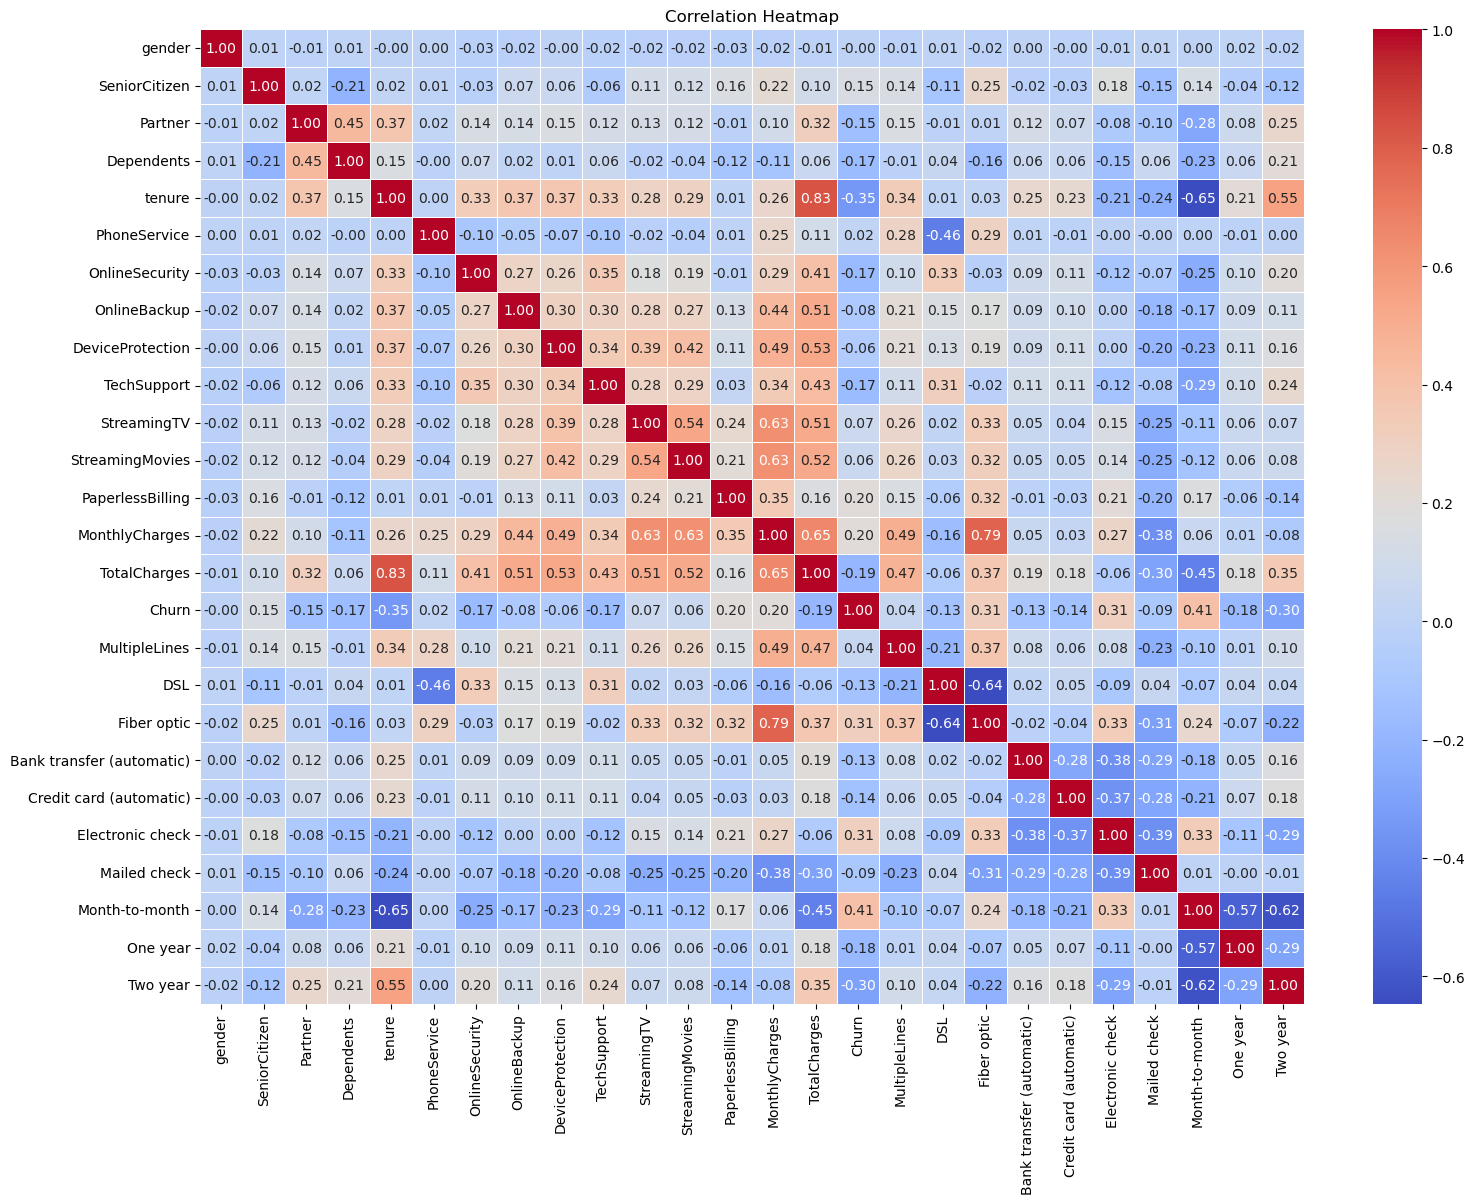

In [140]:
train_1=train.drop("customerID",axis=1)
corr = train_1.corr()
plt.figure(figsize=(16, 12))
sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    linewidths=0.7
)
plt.tight_layout()
plt.title("Correlation Heatmap")
plt.show()